<a href="https://colab.research.google.com/github/tburger101/max_reception/blob/main/Longest_Rceptions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
''' 
In order to figure out what the median longest reception should be, the first thing we need to figure out is what Kelce's recption distribution should look like.
To do this the first thing we need is a mean reception number. When I look at at Betonline I can see the prop line in at 7.5 juiced towards the under. So I make the 
average 7. From here I draw 100K poisson distributed samples.

I subscribe to FTN data so I have play by play data for the entire 2022 season. The Kelce_recetpions CSV is just the sample of all his catches (regular season + playoffs). Can load
this file from the git repo. 
'''

samples=np.random.poisson(7, 100000)
kelce_rec_df=pd.read_csv("/content/Kelce_receptions.csv")
kelce_yds=kelce_rec_df['yds'].values

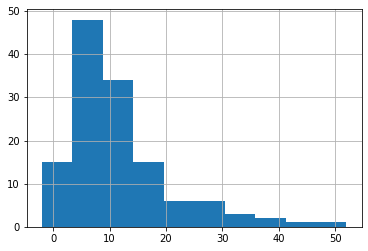

In [52]:
'''
Below is a histogram of the receiving yards on Kelce's 131 catches for the 2022 season. Since we have a pretty large sample and the histogram looks reasonably distributed 
in the next steps we will just randomly sample from his 2022 catches with replacement.
'''

kelce_rec_df['yds'].hist()

In [53]:
'''
Here we go through our reception distribution created above and draw reception samples from our data frame, take the max of all the sampled cataches, and add that to
the max_yds_sim list. Later we can use this list to determine the median.
'''

max_yds_sim=[]
for x in np.unique(samples):
  samples_to_draw=np.count_nonzero(samples == x)
  for iteration in range(0,samples_to_draw):
    if x==0:
      max_yds_sim.append(0)
    else:
      max_yds_sim.append(np.max(kelce_rec_df['yds'].sample(x,replace=True)))


In [54]:
'''
Using this approach we calculate the median longest reception
'''

np.median(np.array(max_yds_sim))

23.0

In [61]:
'''
We can use our sample data to guage where the max reception line will have value based on a -115 juice
'''
max_yds_array=np.array(max_yds_sim)

line=21

for line in [20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5]:
  print(str(line)+" "+'under_percent', np.count_nonzero(max_yds_array < line)/len(max_yds_sim))




20.5 under_percent 0.40607
21.5 under_percent 0.40607
22.5 under_percent 0.45178
23.5 under_percent 0.50245
24.5 under_percent 0.50245
25.5 under_percent 0.52971
26.5 under_percent 0.55844
27.5 under_percent 0.65529
28.5 under_percent 0.65529
29.5 under_percent 0.69124
30.5 under_percent 0.69124
